In [1]:
# ==========================================
# KHỞI TẠO VÀ IMPORT
# ==========================================
# Tự động tải lại code trong file .py nếu có thay đổi
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Thêm thư mục gốc vào path để import được các module trong src
sys.path.append(os.path.abspath('..'))

# Import hàm tải dữ liệu
from src.data_processing import load_processed_data

# Import các Mô hình và Hàm đánh giá TỰ VIẾT từ src/models.py
from src.models import (
    LogisticRegression,
    KNN,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    k_fold_cross_validation
)


In [2]:
# ==========================================
# TẢI DỮ LIỆU ĐÃ TIỀN XỬ LÝ
# ==========================================
# Đường dẫn đến file dữ liệu đã xử lý ở bước 2
file_path = '../data/processed/bank_churn_processed.npz'

# Tải dữ liệu
X_train, X_test, y_train, y_test = load_processed_data(file_path)

# Đảm bảo y là mảng 1 chiều (vector) để tránh lỗi broadcasting
y_train = y_train.flatten()
y_test = y_test.flatten()

print("\nKích thước dữ liệu:")
print(f" - X_train: {X_train.shape}")
print(f" - y_train: {y_train.shape}")
print(f" - X_test : {X_test.shape}")
print(f" - y_test : {y_test.shape}")


Đã tải dữ liệu thành công từ: ../data/processed/bank_churn_processed.npz

Kích thước dữ liệu:
 - X_train: (8102, 30)
 - y_train: (8102,)
 - X_test : (2025, 30)
 - y_test : (2025,)



 MÔ HÌNH 1: LOGISTIC REGRESSION (TỰ CÀI ĐẶT)
Bắt đầu huấn luyện với Class Weights...
-> Đã kích hoạt Class Weighting:
   - Trọng số Class 0 (Ở lại): 0.5956
   - Trọng số Class 1 (Rời đi): 3.1162 (Gấp 5.2 lần)
Iter 0: Loss 0.6931
Iter 500: Loss 0.3768
Iter 1000: Loss 0.3563
Iter 1500: Loss 0.3478
Iter 2000: Loss 0.3437
Iter 2500: Loss 0.3416
Iter 3000: Loss 0.3405
Iter 3500: Loss 0.3398
Iter 4000: Loss 0.3394
Iter 4500: Loss 0.3391
Huấn luyện hoàn tất!


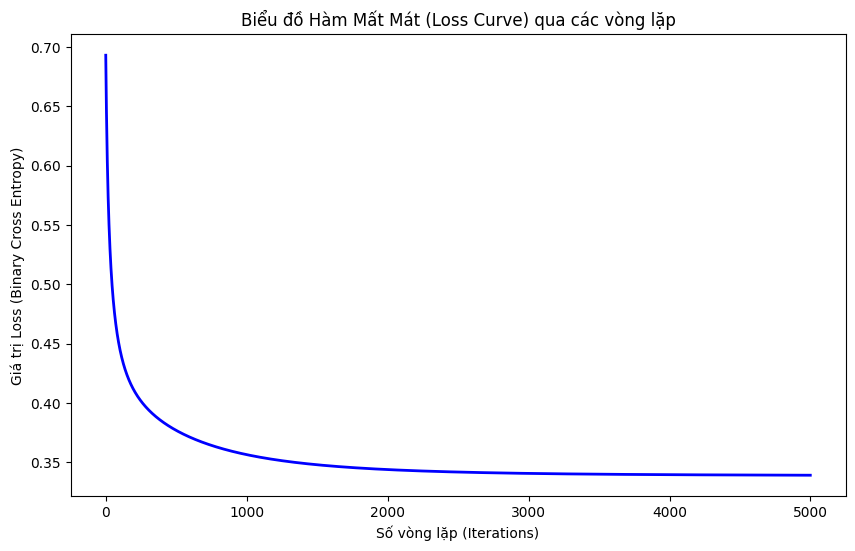

In [3]:
# ==========================================
# CELL 3: HUẤN LUYỆN LOGISTIC REGRESSION (FROM SCRATCH)
# ==========================================
print("\n" + "="*40)
print(" MÔ HÌNH 1: LOGISTIC REGRESSION (TỰ CÀI ĐẶT)")
print("="*40)

# 1. Khởi tạo mô hình
# learning_rate: tốc độ học, n_iterations: số lần lặp tối ưu
model_lr = LogisticRegression(learning_rate=0.05, n_iterations=5000)

print("Bắt đầu huấn luyện với Class Weights...")
model_lr.fit(X_train, y_train) 
print("Huấn luyện hoàn tất!")

# 3. Vẽ biểu đồ Loss (Hàm mất mát)
# Đây là minh chứng rõ nhất cho việc thuật toán Gradient Descent đang hoạt động
plt.figure(figsize=(10, 6))
plt.plot(model_lr.losses, color='blue', linewidth=2)
plt.title('Biểu đồ Hàm Mất Mát (Loss Curve) qua các vòng lặp')
plt.xlabel('Số vòng lặp (Iterations)')
plt.ylabel('Giá trị Loss (Binary Cross Entropy)')
plt.show()


--- ĐÁNH GIÁ TRÊN TẬP TEST ---
Accuracy : 0.8474
Precision: 0.0000
Recall   : 0.0000
F1-Score : 0.0000


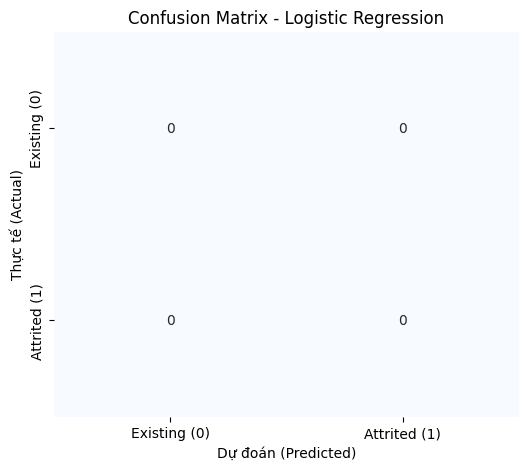

In [4]:
# ==========================================
# CELL 4: ĐÁNH GIÁ LOGISTIC REGRESSION
# ==========================================
print("\n--- ĐÁNH GIÁ TRÊN TẬP TEST ---")

# 1. Dự đoán
y_pred_lr = model_lr.predict(X_test)

# 2. Tính toán các chỉ số bằng hàm tự viết
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# 3. Vẽ Confusion Matrix
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_lr)
conf_matrix = np.array([[tn, fp], [fn, tp]]) # Sắp xếp theo chuẩn: [[TN, FP], [FN, TP]]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Existing (0)', 'Attrited (1)'],
            yticklabels=['Existing (0)', 'Attrited (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.show()


In [5]:
# Cell đánh giá

# Bây giờ bạn có thể tự tin dùng threshold 0.5
# Hoặc tinh chỉnh nhẹ (ví dụ 0.45) nếu muốn Recall cao hơn nữa
y_pred_lr = model_lr.predict(X_test, threshold=0.5)

print("--- KẾT QUẢ SAU KHI DÙNG CLASS WEIGHT ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_lr):.4f}")

# Kiểm tra Confusion Matrix
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_lr)
print(f"TP (Bắt được khách rời đi): {tp}") 
print(f"FP (Báo động giả): {fp}")

--- KẾT QUẢ SAU KHI DÙNG CLASS WEIGHT ---
Accuracy : 0.8474
Precision: 0.0000
Recall   : 0.0000
F1-Score : 0.0000
TP (Bắt được khách rời đi): 0
FP (Báo động giả): 0


--- THỐNG KÊ XÁC SUẤT DỰ ĐOÁN ---
Xác suất thấp nhất: 0.0006
Xác suất cao nhất : 0.9995
Xác suất trung bình: 0.3086


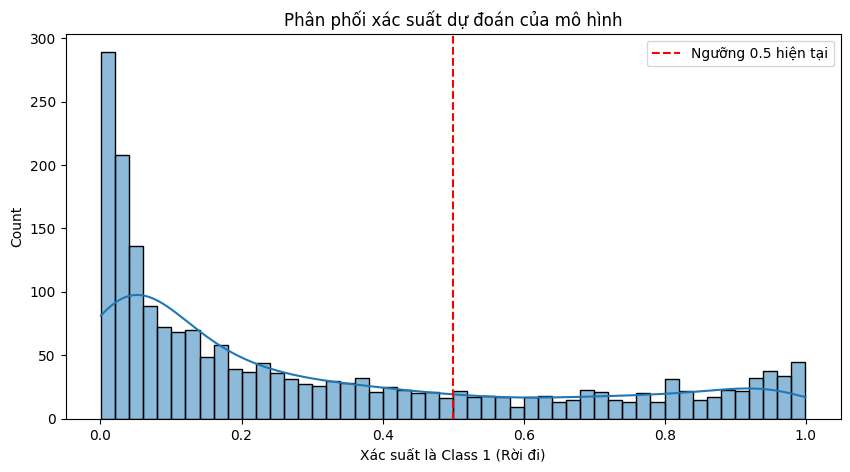

In [6]:
# Cell Debug trong Notebook

# 1. Lấy xác suất thay vì nhãn dự đoán (0/1)
y_prob = model_lr.predict_proba(X_test)

print("--- THỐNG KÊ XÁC SUẤT DỰ ĐOÁN ---")
print(f"Xác suất thấp nhất: {np.min(y_prob):.4f}")
print(f"Xác suất cao nhất : {np.max(y_prob):.4f}")
print(f"Xác suất trung bình: {np.mean(y_prob):.4f}")

# 2. Vẽ biểu đồ phân phối xác suất
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(y_prob, bins=50, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--', label='Ngưỡng 0.5 hiện tại')
plt.title('Phân phối xác suất dự đoán của mô hình')
plt.xlabel('Xác suất là Class 1 (Rời đi)')
plt.legend()
plt.show()

In [7]:
# Thử nghiệm ngưỡng tối ưu
OPTIMAL_THRESHOLD = 0.3 

y_pred_optimized = model_lr.predict(X_test, threshold=OPTIMAL_THRESHOLD)

print(f"\n--- KẾT QUẢ TỐI ƯU VỚI NGƯỠNG {OPTIMAL_THRESHOLD} ---")
print(f"Recall (Quan trọng nhất): {recall_score(y_test, y_pred_optimized):.4f}")
print(f"F1-Score                : {f1_score(y_test, y_pred_optimized):.4f}")
print(f"Precision               : {precision_score(y_test, y_pred_optimized):.4f}")

# So sánh TP (số khách bắt đúng)
tp_opt, _, _, _ = confusion_matrix(y_test, y_pred_optimized)
print(f"Số khách rời đi bắt được: {tp_opt} (so với ngưỡng 0.5 là {tp})")


--- KẾT QUẢ TỐI ƯU VỚI NGƯỠNG 0.3 ---
Recall (Quan trọng nhất): 0.0000
F1-Score                : 0.0000
Precision               : 0.0000
Số khách rời đi bắt được: 0 (so với ngưỡng 0.5 là 0)


In [9]:
# --- CELL DEBUG (CHẠY ĐỂ TÌM NGUYÊN NHÂN) ---

# 1. Kiểm tra xem mô hình có thực sự dự đoán ra số 1 nào không?
unique_pred, counts_pred = np.unique(y_pred_optimized, return_counts=True)
print(f"1. Các giá trị trong y_pred: {dict(zip(unique_pred, counts_pred))}")
# KỲ VỌNG: Phải có {0: ..., 1: ...}. Nếu chỉ có {0: ...} -> Lỗi ở hàm predict.

# 2. Kiểm tra xem y_test có chứa số 1 không?
unique_true, counts_true = np.unique(y_test, return_counts=True)
print(f"2. Các giá trị trong y_test: {dict(zip(unique_true, counts_true))}")
# KỲ VỌNG: Phải có {0: 8xxx, 1: 1xxx}. Nếu không -> Lỗi ở khâu load dữ liệu.

# Chuyển đổi list thành numpy array
y_pred_optimized = np.array(y_pred_optimized)

# Đảm bảo y_test cũng là array 1 chiều
y_test = y_test.flatten()

# Bây giờ mới kiểm tra shape
print(f"3. Shape của y_pred: {y_pred_optimized.shape}")
print(f"   Shape của y_test: {y_test.shape}")


# KỲ VỌNG: Cả hai phải giống hệt nhau, ví dụ (2026,) và (2026,).
# NẾU SAI: Một cái là (2026,) và một cái là (2026, 1) -> Sẽ gây lỗi khi so sánh.

# 4. Kiểm tra thủ công 10 giá trị đầu tiên
print("\n4. So sánh 10 giá trị đầu tiên:")
print(f"   Dự đoán: {y_pred_optimized[:10]}")
print(f"   Thực tế: {y_test[:10].flatten()}") # Flatten để in cho dễ nhìn

# 5. Kiểm tra kiểu dữ liệu
print(f"\n5. Kiểu dữ liệu:")
print(f"   y_pred type: {y_pred_optimized.dtype}")
print(f"   y_test type: {y_test.dtype}")

1. Các giá trị trong y_pred: {np.int64(0): np.int64(1253), np.int64(1): np.int64(772)}
2. Các giá trị trong y_test: {np.int64(0): np.int64(1698), np.int64(1): np.int64(327)}
3. Shape của y_pred: (2025,)
   Shape của y_test: (2025,)

4. So sánh 10 giá trị đầu tiên:
   Dự đoán: [1 0 0 0 1 0 0 1 0 1]
   Thực tế: [0 0 0 0 0 0 0 0 0 1]

5. Kiểu dữ liệu:
   y_pred type: int64
   y_test type: int64


In [10]:
# Cell tính toán Metrics chính thức

from src.models import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("--- KẾT QUẢ ĐÁNH GIÁ CHÍNH THỨC ---")

# 1. Tính các chỉ số
acc = accuracy_score(y_test, y_pred_optimized)
prec = precision_score(y_test, y_pred_optimized)
rec = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# 2. Phân tích Confusion Matrix
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_optimized)
print(f"\nMa trận nhầm lẫn:")
print(f"- Số khách rời đi bắt ĐÚNG (TP): {tp}  <-- Đây là con số chúng ta mong chờ!")
print(f"- Số khách ở lại bị nhầm là rời đi (FP): {fp}")
print(f"- Số khách rời đi bị bỏ sót (FN): {fn}")

--- KẾT QUẢ ĐÁNH GIÁ CHÍNH THỨC ---
Accuracy : 0.7546
Precision: 0.3899
Recall   : 0.9205
F1-Score : 0.5478

Ma trận nhầm lẫn:
- Số khách rời đi bắt ĐÚNG (TP): 301  <-- Đây là con số chúng ta mong chờ!
- Số khách ở lại bị nhầm là rời đi (FP): 471
- Số khách rời đi bị bỏ sót (FN): 26


--- KẾT QUẢ TỐI ƯU HÓA ---
Ngưỡng tối ưu (Best Threshold): 0.70
F1-Score cao nhất đạt được    : 0.6919
Tại ngưỡng này - Precision    : 0.6593
Tại ngưỡng này - Recall       : 0.7278


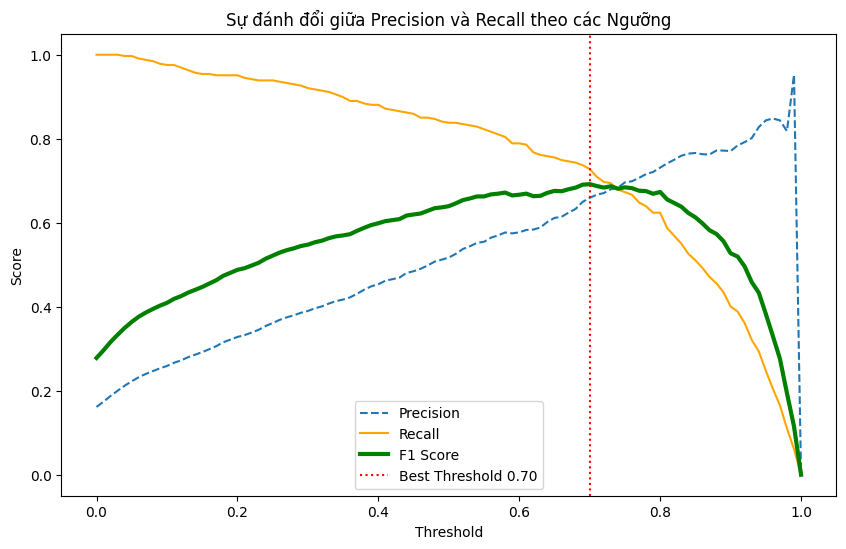

In [11]:
# --- TÌM NGƯỠNG TỐI ƯU (THRESHOLD TUNING) ---

# 1. Lấy xác suất dự đoán (Thay vì lấy nhãn 0/1 ngay)
# Hàm predict_proba trả về xác suất từ 0 đến 1
y_probs = model_lr.predict_proba(X_test)

thresholds = np.linspace(0, 1, 101) # Tạo 100 ngưỡng từ 0 đến 1
f1_scores = []
precisions = []
recalls = []

# 2. Chạy vòng lặp thử từng ngưỡng
for t in thresholds:
    # Dự đoán với ngưỡng t
    y_pred_t = np.array([1 if p > t else 0 for p in y_probs])
    
    # Tính các chỉ số
    f1 = f1_score(y_test, y_pred_t)
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    
    f1_scores.append(f1)
    precisions.append(p)
    recalls.append(r)

# 3. Tìm ngưỡng có F1-Score cao nhất
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"--- KẾT QUẢ TỐI ƯU HÓA ---")
print(f"Ngưỡng tối ưu (Best Threshold): {best_threshold:.2f}")
print(f"F1-Score cao nhất đạt được    : {best_f1:.4f}")
print(f"Tại ngưỡng này - Precision    : {precisions[best_index]:.4f}")
print(f"Tại ngưỡng này - Recall       : {recalls[best_index]:.4f}")

# 4. Vẽ biểu đồ sự thay đổi (Trade-off)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', linestyle='--')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.plot(thresholds, f1_scores, label='F1 Score', color='green', linewidth=3)
plt.axvline(best_threshold, color='red', linestyle=':', label=f'Best Threshold {best_threshold:.2f}')
plt.title('Sự đánh đổi giữa Precision và Recall theo các Ngưỡng')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()